Regularized logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Step 2: LOADING DATA FROM CSV INTO X AND Y

In [3]:
# the data from csv is stored in X(30 features) and Y(diagnosis)
cancerdata = pd.read_csv("/Users/islam/Desktop/classification/Cancer_Data.csv")
X = cancerdata.drop(columns=["id", "diagnosis", "Unnamed: 32"]).to_numpy()
y = cancerdata["diagnosis"].map({"M":1,"B":0}).to_numpy()
print(cancerdata.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Step 3: NORMALIZING THE DATA SO THAT IT CAN BE ON THE SAME SCALE

In [4]:
# Data is normalized also data is divided into train data and test data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SCATTER PLOT OF TWO FEATURES IN TRAINING MODEL

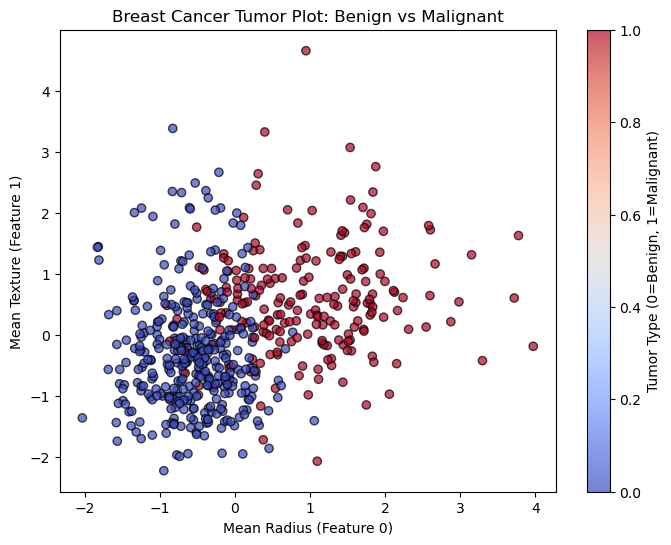

In [5]:
import matplotlib.pyplot as plt

# Let's assume y=0 → benign, y=1 → malignant
# Pick two features: mean radius (0), mean texture (1)
f1, f2 = 0, 1  

plt.figure(figsize=(8,6))
plt.scatter(
    X[:, f1], X[:, f2], 
    c=y, cmap="coolwarm", alpha=0.7, edgecolor="k"
)

plt.xlabel("Mean Radius (Feature 0)")
plt.ylabel("Mean Texture (Feature 1)")
plt.title("Breast Cancer Tumor Plot: Benign vs Malignant")
plt.colorbar(label="Tumor Type (0=Benign, 1=Malignant)")
plt.show()


SIGMOID FUNCTION

In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

COST FUNCTION

In [7]:
def compute_cost(X, y, w, b, lambda_=1):
    m, n = X.shape
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    cost = (-1 / m) * (np.dot(y, np.log(f_wb + 1e-15)) + np.dot((1 - y), np.log(1 - f_wb + 1e-15)))
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    return cost + reg_cost

GRADIANT FUNCTION

In [8]:
def compute_gradient(X, y, w, b, lambda_=1):
    m, n = X.shape
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    error = f_wb - y
    dj_dw = (1 / m) * np.dot(X.T, error) + (lambda_ / m) * w
    dj_db = (1 / m) * np.sum(error)
    return dj_db, dj_dw

GRADIANT DESCENT

In [9]:
def gradient_descent(X, y, w, b, alpha, num_iters, lambda_=1):
    cost_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost(X, y, w, b, lambda_)
            cost_history.append(cost)
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return w, b, cost_history

PREDICTION FUNCTION

In [10]:
def predict(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)

BOUNDARY PLOT FUNCTION

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, w, b, feature1=0, feature2=1):
    """
    Plots logistic regression decision boundary using two selected features.
    X: feature matrix
    y: labels
    w: weight vector from gradient descent
    b: bias
    feature1, feature2: indices of features to plot
    """
    # Select only 2 features for visualization
    X_plot = X[:, [feature1, feature2]]
    w_sub = np.array([w[feature1], w[feature2]])  # pick weights for chosen features

    # Create meshgrid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict probabilities on grid
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w_sub) + b
    Z = 1 / (1 + np.exp(-Z))  # sigmoid
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z >= 0.5, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
    plt.xlabel(f"Feature {feature1}")
    plt.ylabel(f"Feature {feature2}")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()


TRAINING MODEL

Iteration    0: Cost 0.5265
Iteration  100: Cost 0.1089
Iteration  200: Cost 0.0922
Iteration  300: Cost 0.0853
Iteration  400: Cost 0.0814
Iteration  500: Cost 0.0789
Iteration  600: Cost 0.0772
Iteration  700: Cost 0.0759
Iteration  800: Cost 0.0749
Iteration  900: Cost 0.0741
Iteration 1000: Cost 0.0735
Iteration 1100: Cost 0.0729
Iteration 1200: Cost 0.0725
Iteration 1300: Cost 0.0721
Iteration 1400: Cost 0.0718
Iteration 1500: Cost 0.0716
Iteration 1600: Cost 0.0714
Iteration 1700: Cost 0.0712
Iteration 1800: Cost 0.0710
Iteration 1900: Cost 0.0709


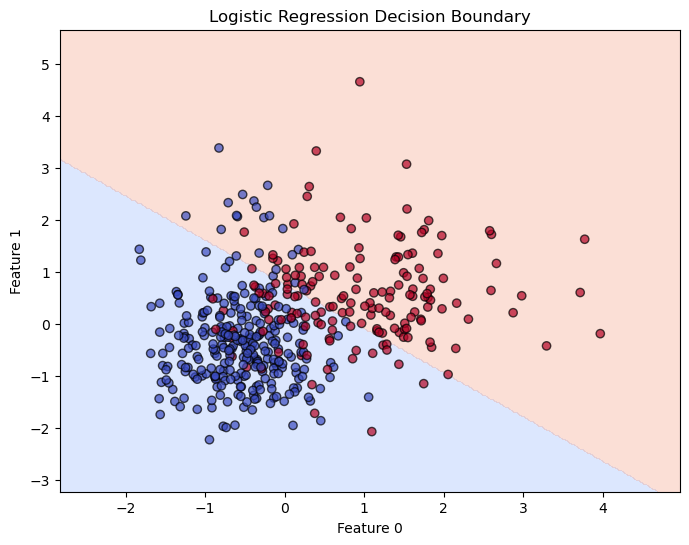

In [12]:
m, n = X_train.shape
w = np.zeros(n)
b = 0

alpha = 0.1       # learning rate
iterations = 2000
lambda_ = 1       # regularization strength

w, b, costs = gradient_descent(X_train, y_train, w, b, alpha, iterations, lambda_)
plot_decision_boundary(X_train, y_train, w, b, feature1=0, feature2=1)

TEST ANALYSIS

In [13]:
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

train_acc = np.mean(y_pred_train == y_train) * 100
test_acc = np.mean(y_pred_test == y_test) * 100

print("\n Training Accuracy:", train_acc)
print(" Testing Accuracy :", test_acc)


 Training Accuracy: 98.68131868131869
 Testing Accuracy : 99.12280701754386


COST V/S ITERATIONS PLOT

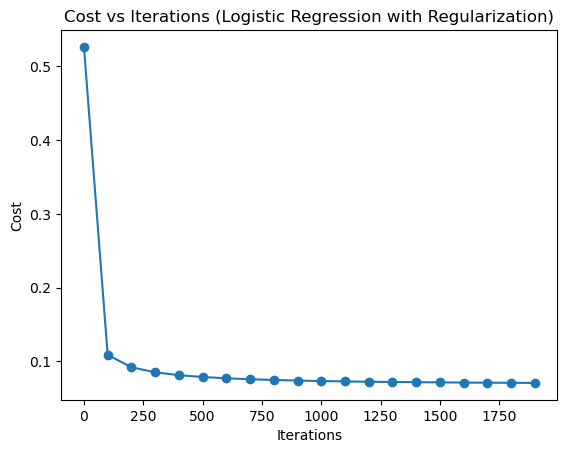

In [14]:
plt.plot(np.arange(len(costs)) * 100, costs, marker="o")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Logistic Regression with Regularization)")
plt.show()